In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the Titanic dataset
df = pd.read_csv('titanic.csv')  
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Basic information about the dataset
print("Dataset Info:")
df.info()
print("\n" + "="*50)
print("Statistical Summary:")
df.describe(include='all')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Statistical Summary:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Missing Values Analysis:
          Missing Count  Missing Percentage
Age                 177           19.865320
Cabin               687           77.104377
Embarked              2            0.224467


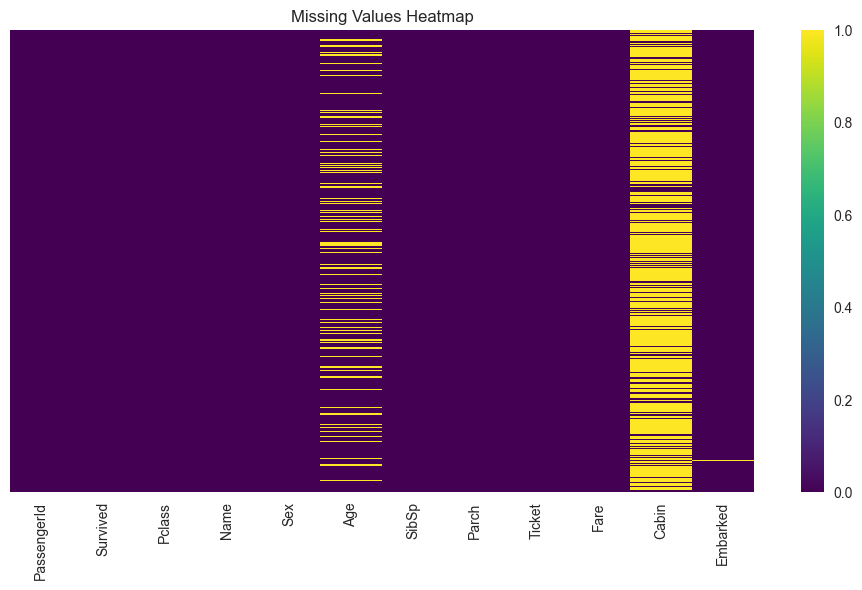

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print("Missing Values Analysis:")
print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


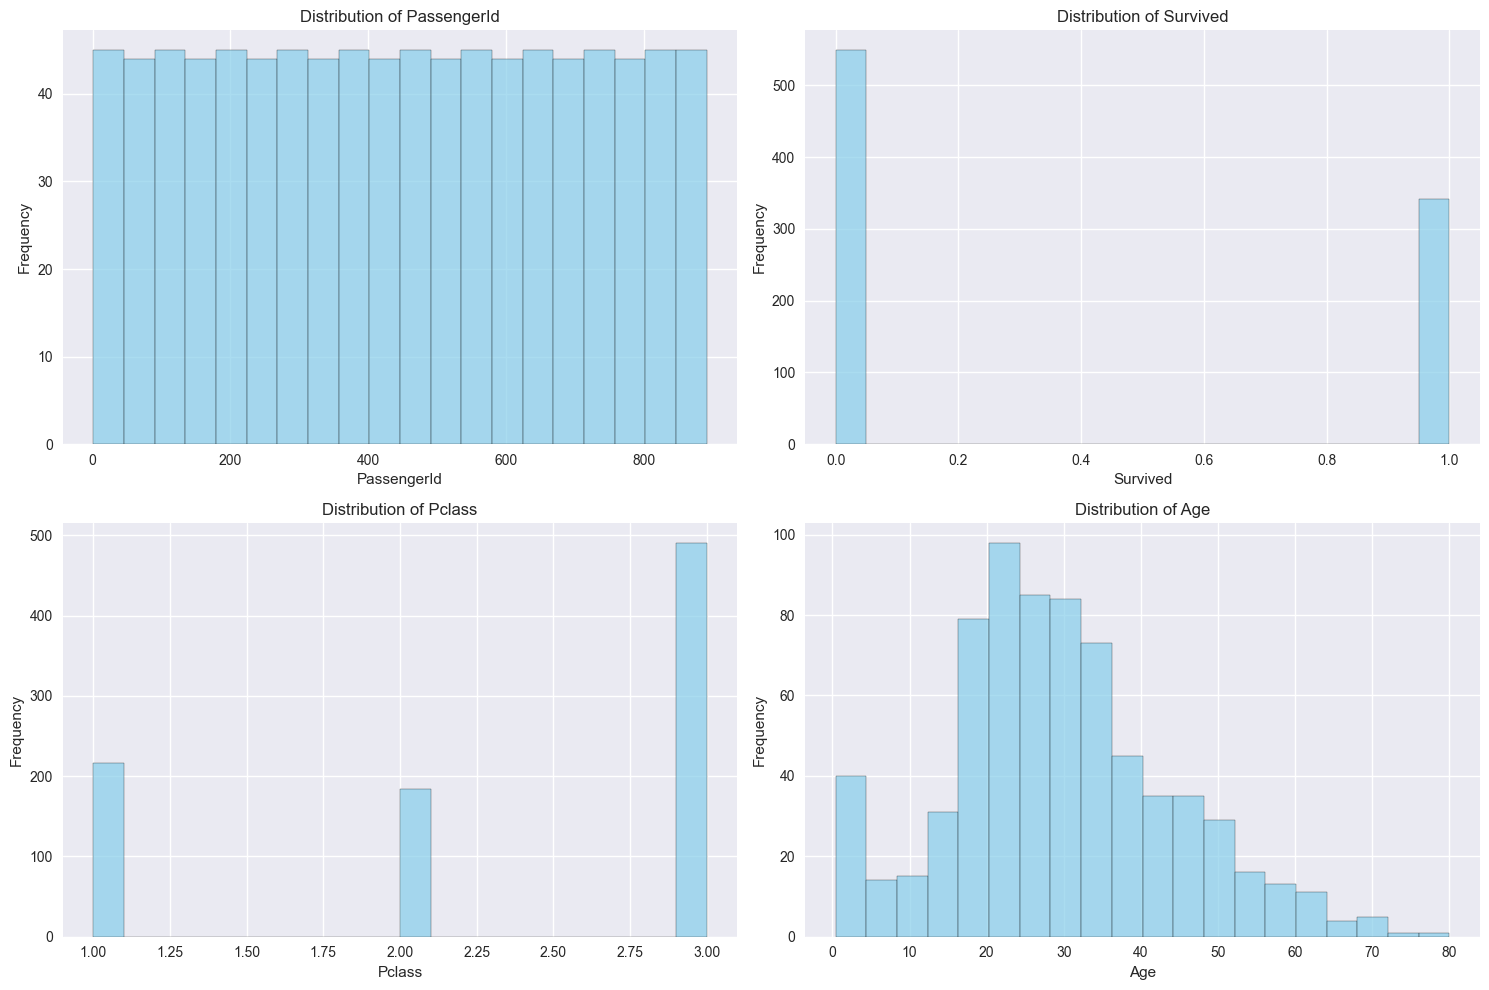

In [5]:
# Analyze numerical variables
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", numerical_cols)

# Histograms for numerical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols[:4]):
    axes[i].hist(df[col].dropna(), bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

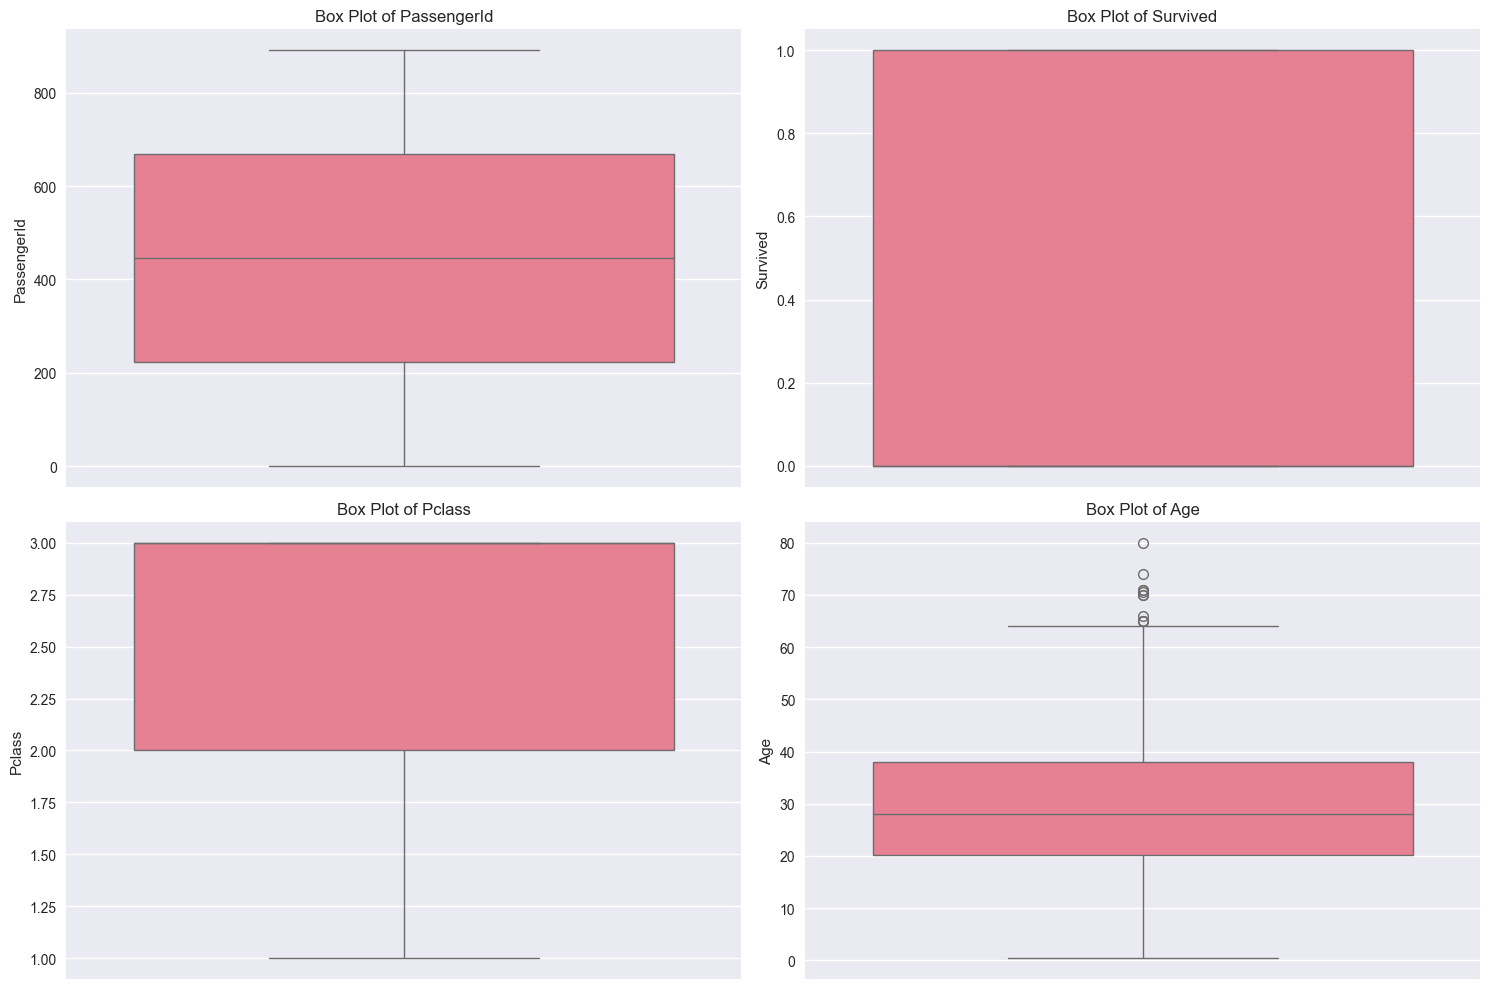

Outliers in Age: 11
Outliers in Fare: 116


In [6]:
# Box plots to detect outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols[:4]):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

# Identify outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check outliers for Age and Fare
print("Outliers in Age:", len(detect_outliers(df, 'Age')))
print("Outliers in Fare:", len(detect_outliers(df, 'Fare')))

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


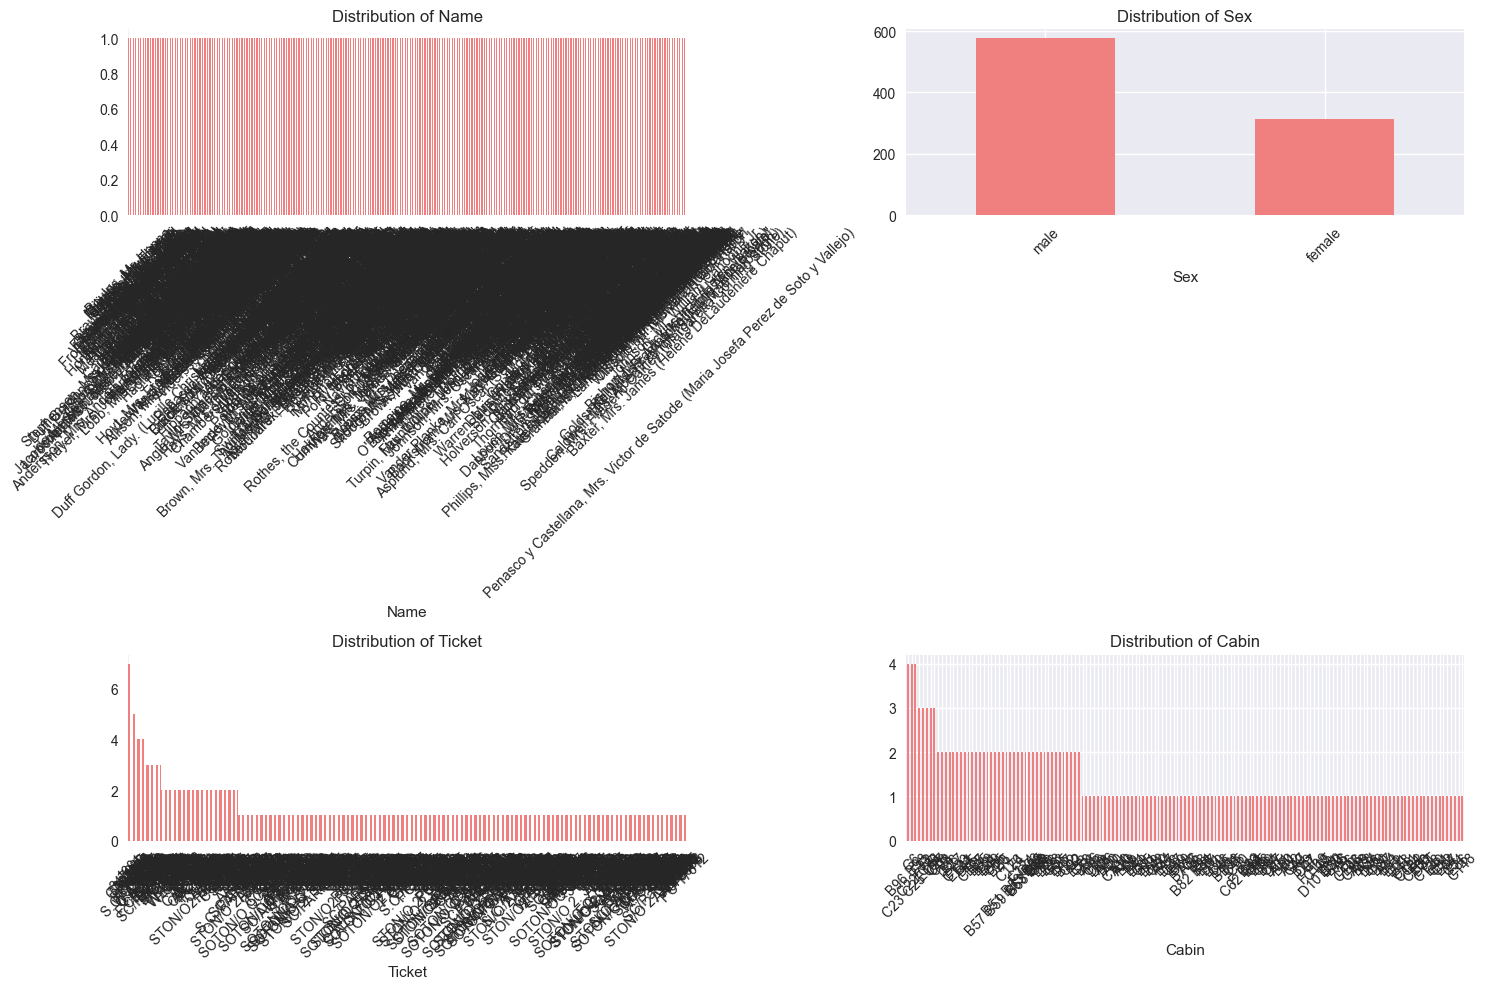

In [7]:
# Analyze categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Count plots for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_cols[:4]):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

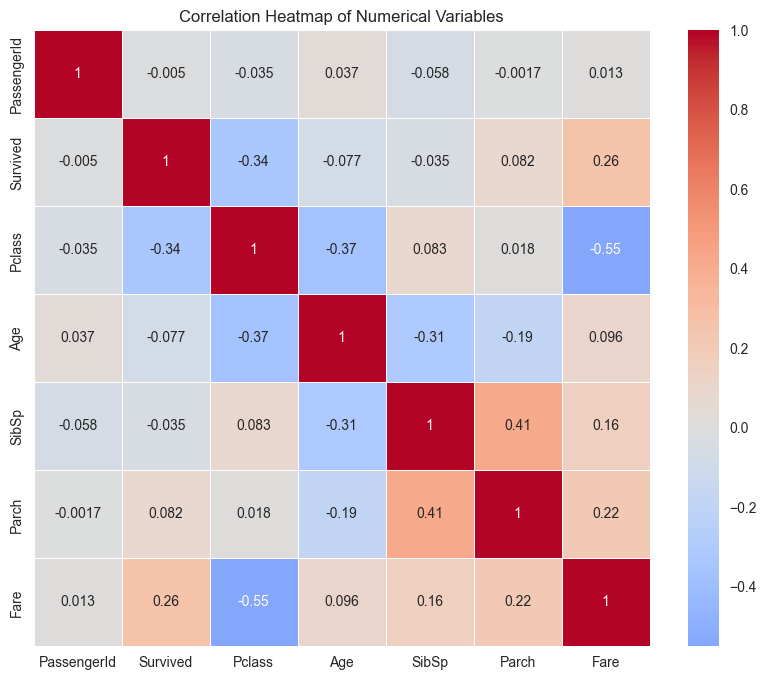

Strong correlations (>0.5 or <-0.5):
Pclass vs Fare: -0.549


In [8]:
# Correlation matrix for numerical variables
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Print strong correlations
print("Strong correlations (>0.5 or <-0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {corr_value:.3f}")

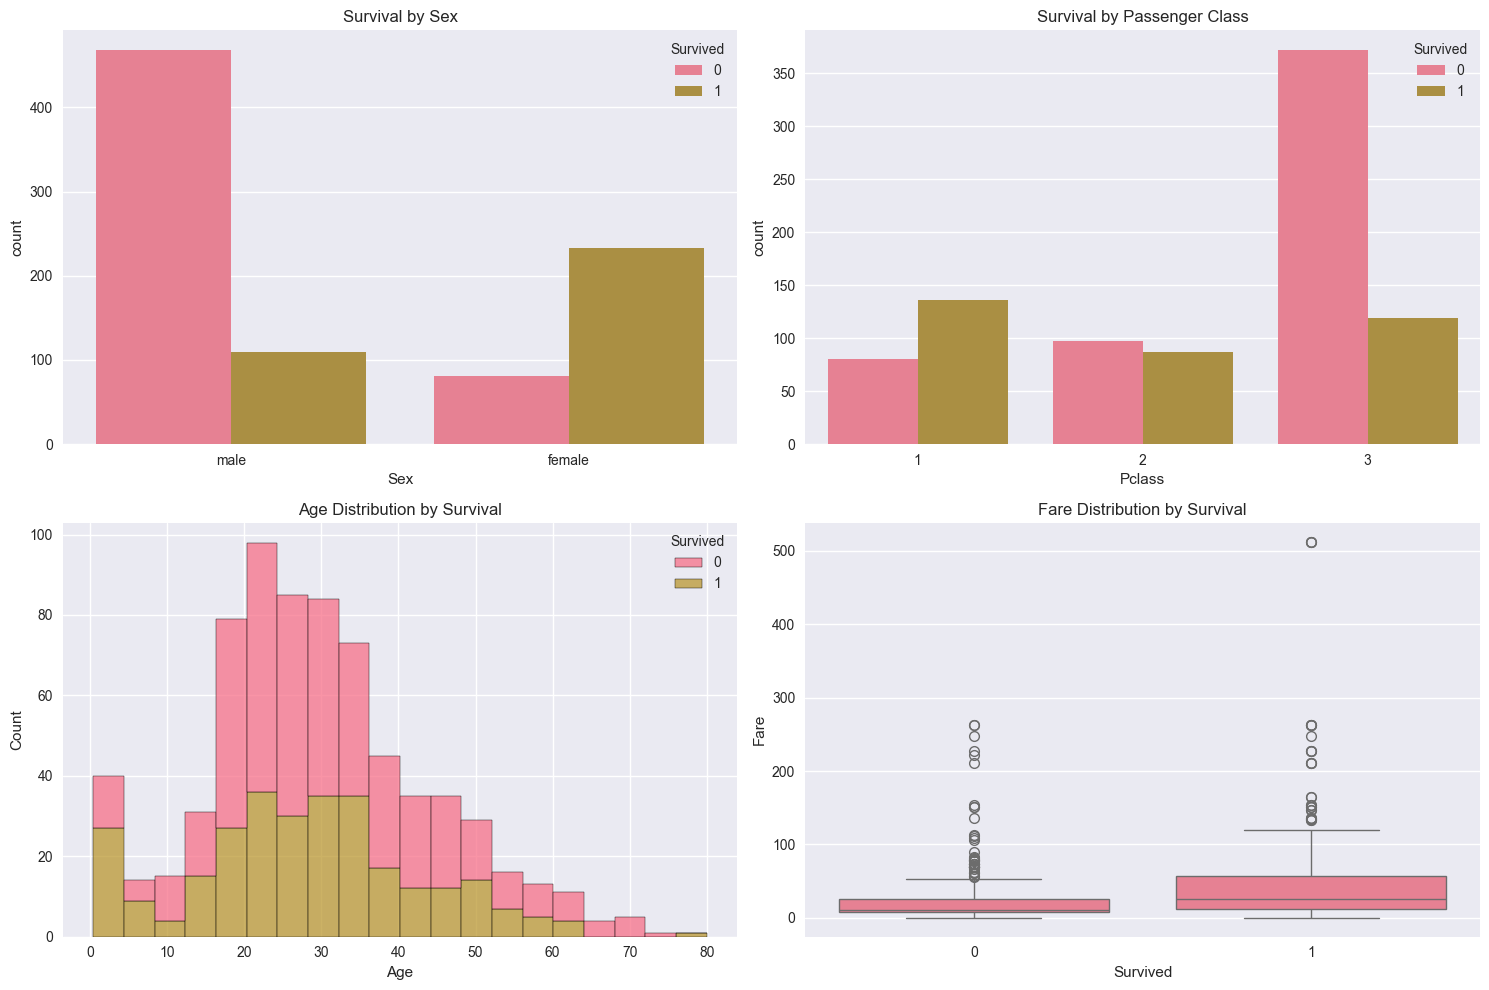

In [9]:
# Survival analysis by different variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Survival by Sex
sns.countplot(data=df, x='Sex', hue='Survived', ax=axes[0,0])
axes[0,0].set_title('Survival by Sex')

# Survival by Passenger Class
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[0,1])
axes[0,1].set_title('Survival by Passenger Class')

# Age distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', ax=axes[1,0])
axes[1,0].set_title('Age Distribution by Survival')

# Fare distribution by Survival
sns.boxplot(data=df, x='Survived', y='Fare', ax=axes[1,1])
axes[1,1].set_title('Fare Distribution by Survival')

plt.tight_layout()
plt.show()

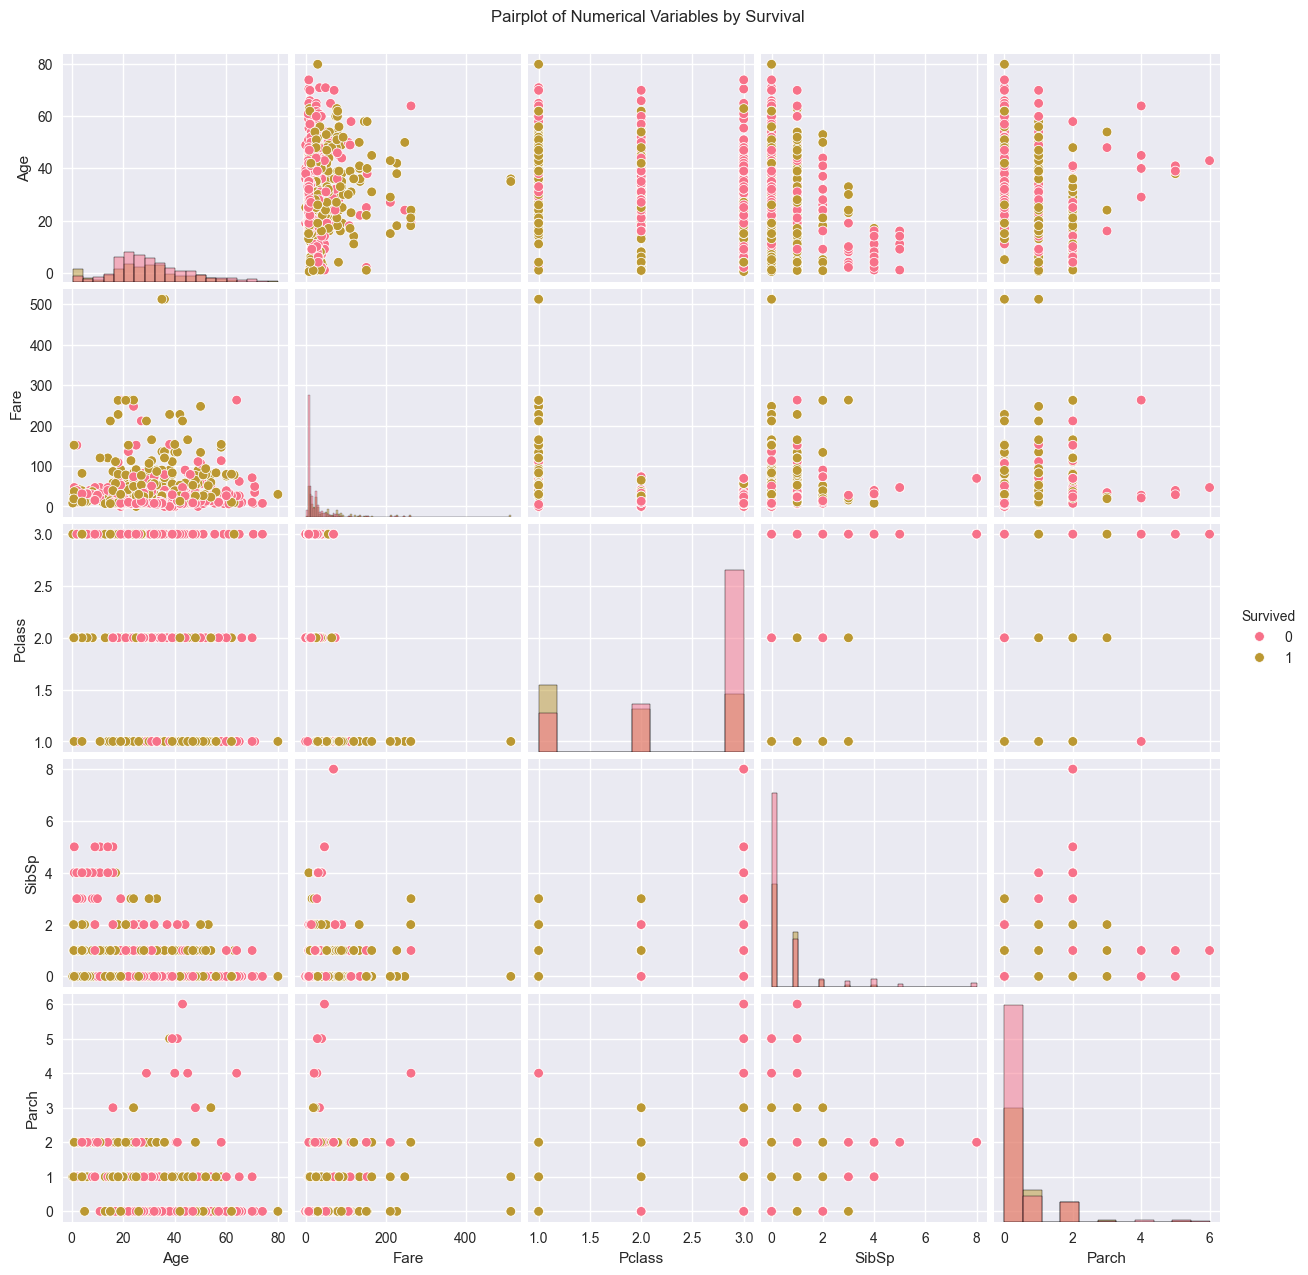

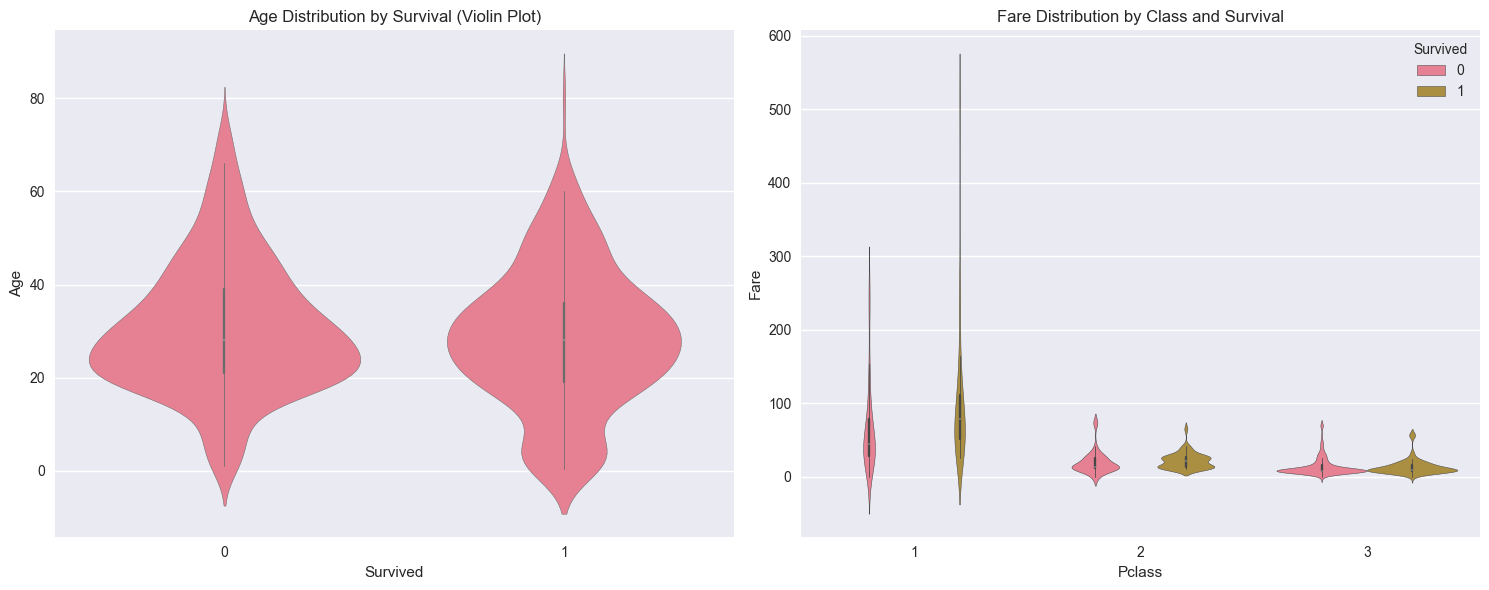

In [12]:
numerical_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
available_features = [col for col in numerical_features if col in df.columns]

# Pairplot for numerical variables with Survived
sns.pairplot(df[available_features + ['Survived']], hue='Survived', diag_kind='hist')
plt.suptitle('Pairplot of Numerical Variables by Survival', y=1.02)
plt.show()

# Violin plots for better distribution understanding
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.violinplot(data=df, x='Survived', y='Age', ax=axes[0])
axes[0].set_title('Age Distribution by Survival (Violin Plot)')

sns.violinplot(data=df, x='Pclass', y='Fare', hue='Survived', ax=axes[1])
axes[1].set_title('Fare Distribution by Class and Survival')

plt.tight_layout()
plt.show()

In [13]:
# Summary of Key Insights
print("KEY FINDINGS FROM EDA:")
print("="*50)
print("1. Missing Values:")
print("   - Age: {:.1f}% missing".format((df['Age'].isnull().sum()/len(df))*100))
if 'Cabin' in df.columns:
    print("   - Cabin: {:.1f}% missing".format((df['Cabin'].isnull().sum()/len(df))*100))
if 'Embarked' in df.columns:
    print("   - Embarked: {:.1f}% missing".format((df['Embarked'].isnull().sum()/len(df))*100))

print("\n2. Survival Insights:")
print("   - Overall survival rate: {:.1f}%".format((df['Survived'].mean())*100))
if 'Sex' in df.columns:
    print("   - Female survival rate: {:.1f}%".format((df[df['Sex']=='female']['Survived'].mean())*100))
    print("   - Male survival rate: {:.1f}%".format((df[df['Sex']=='male']['Survived'].mean())*100))

print("\n3. Class Analysis:")
print("   - 1st class survival: {:.1f}%".format((df[df['Pclass']==1]['Survived'].mean())*100))
print("   - 2nd class survival: {:.1f}%".format((df[df['Pclass']==2]['Survived'].mean())*100))
print("   - 3rd class survival: {:.1f}%".format((df[df['Pclass']==3]['Survived'].mean())*100))

print("\n4. Age Analysis:")
print("   - Average age of survivors: {:.1f} years".format(df[df['Survived']==1]['Age'].mean()))
print("   - Average age of non-survivors: {:.1f} years".format(df[df['Survived']==0]['Age'].mean()))

KEY FINDINGS FROM EDA:
1. Missing Values:
   - Age: 19.9% missing
   - Cabin: 77.1% missing
   - Embarked: 0.2% missing

2. Survival Insights:
   - Overall survival rate: 38.4%
   - Female survival rate: 74.2%
   - Male survival rate: 18.9%

3. Class Analysis:
   - 1st class survival: 63.0%
   - 2nd class survival: 47.3%
   - 3rd class survival: 24.2%

4. Age Analysis:
   - Average age of survivors: 28.3 years
   - Average age of non-survivors: 30.6 years
